# Indexación Fancy 

En las secciones anteriores, vimos cómo acceder y modificar porciones de arrays utilizando índices simples (por ejemplo, ``arr[0]``), cortes (por ejemplo, ``arr[:5]``), y masks booleanas (por ejemplo, ``arr[arr > 0]``).
En esta sección, veremos otro estilo de indexación de arrays, conocido como *indexación fancy*.
La indexación fancy es como la indexación simple que ya hemos visto, pero pasamos arrays de índices en lugar de escalares individuales.
Esto nos permite acceder y modificar rápidamente subconjuntos complicados de los valores de un array.

## Explorando la indexación de fantasía

La indexación fancy es conceptualmente simple: significa pasar un array de índices para acceder a múltiples elementos del array a la vez.
Por ejemplo, considere el siguiente array:

In [ ]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


Supongamos que queremos acceder a tres elementos diferentes. Podríamos hacerlo así:

In [ ]:
[x[3], x[7], x[2]]

[71, 86, 14]

Alternativamente, podemos pasar un solo list o array de índices para obtener el mismo resultado:

In [ ]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

Cuando se utiliza la indexación fancy, la forma del resultado refleja la forma de las *arrays de índice* en lugar de la forma de la *array indexada*:

In [ ]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

La indexación fancy también funciona en múltiples dimensiones. Considere el siguiente array:

In [ ]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Al igual que en la indexación estándar, el primer índice se refiere a la fila y el segundo a la columna:

In [ ]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

Observa que el primer valor del resultado es ``X[0, 2]``, el segundo es ``X[1, 1]``, y el tercero es ``X[2, 3]``.
El emparejamiento de índices en la indexación de fantasía sigue todas las reglas de difusión que se mencionaron en [Computación en arrays: Broadcasting](02.05-Computación-en-arrays-broadcasting.ipynb).
Así, por ejemplo, si combinamos un vector columna y un vector fila dentro de los índices, obtenemos un resultado bidimensional:

In [ ]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

Aquí, cada valor de fila se empareja con cada vector de columna, exactamente como vimos en la emisión de operaciones aritméticas.
Por ejemplo:

In [ ]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

Siempre es importante recordar con la indexación fancy que el valor de retorno refleja la *forma de los índices*, en lugar de la forma del array que se está indexando.

## Indexación combinada

Para realizar operaciones aún más potentes, la indexación fancy puede combinarse con los otros esquemas de indexación que hemos visto:

In [ ]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


Podemos combinar los índices fancy con los simples:

In [ ]:
X[2, [2, 0, 1]]

array([10,  8,  9])

También podemos combinar la indexación fancy con el corte:

In [ ]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

Y podemos combinar la indexación fancy con el enmascaramiento:

In [ ]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

Todas estas opciones de indexación combinadas conducen a un conjunto muy flexible de operaciones para acceder y modificar los valores del array.

## Ejemplo: Selección de puntos aleatorios

Un uso común de la indexación fancy es la selección de subconjuntos de filas de un array.
Por ejemplo, podríamos tener un array de $N$ por $D$ que represente $N$ puntos en $D$ dimensiones, como los siguientes puntos extraídos de una distribución normal bidimensional:

In [ ]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

Usando las herramientas de trazado que discutiremos en [Introducción a Matplotlib](04.00-Introducción-a-Matplotlib.ipynb), podemos visualizar estos puntos como un gráfico de dispersión:

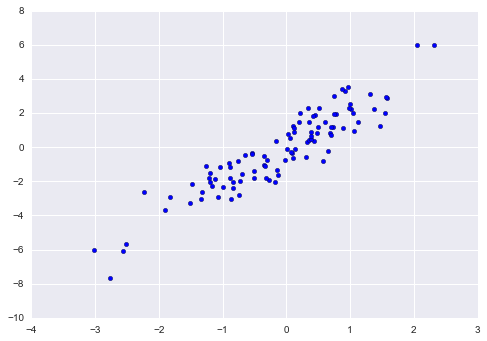

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

Utilicemos la indexación fancy para seleccionar 20 puntos al azar. Lo haremos eligiendo primero 20 índices aleatorios sin repeticiones, y usaremos estos índices para seleccionar una porción del array original:

In [ ]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([93, 45, 73, 81, 50, 10, 98, 94,  4, 64, 65, 89, 47, 84, 82, 80, 25,
       90, 63, 20])

In [ ]:
selection = X[indices]  # indexación fancy aquí
selection.shape

(20, 2)

Ahora, para ver qué puntos fueron seleccionados, vamos a sobretrazar grandes círculos en las ubicaciones de los puntos seleccionados:

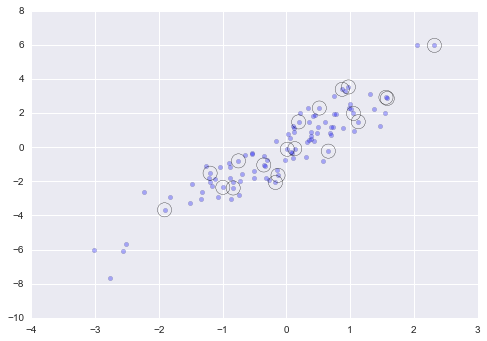

In [ ]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);

Este tipo de estrategia se utiliza a menudo para dividir rápidamente los conjuntos de datos, como suele ser necesario en la división entrenamirnto/prueba para la validación de modelos estadísticos (véase [Hiperparámetros y validación de modelos](05.03-Hiperparámetros-y-validación-de-modelos.ipynb)), y en los enfoques de muestreo para responder a preguntas estadísticas.

## Modificación de valores con indexación fancy

Al igual que la indexación fancy se puede utilizar para acceder a partes de un array, también se puede utilizar para modificar partes de un array.
Por ejemplo, imaginemos que tenemos un array de índices y que queremos establecer los elementos correspondientes en un array con algún valor:

In [ ]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


Para ello podemos utilizar cualquier operador de tipo asignación. Por ejemplo:

In [ ]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


Sin embargo, hay que tener en cuenta que la repetición de índices con estas operaciones puede provocar algunos resultados potencialmente inesperados. Considere lo siguiente:

In [ ]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[ 6.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


¿Dónde ha ido el 4? El resultado de esta operación es asignar primero ``x[0] = 4``, seguido de ``x[0] = 6``.
El resultado, por supuesto, es que ``x[0]`` contiene el valor 6.

Es justo, pero considera esta operación:

In [ ]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([ 6.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])

Es de esperar que ``x[3]`` contenga el valor 2, y que ``x[4]`` contenga el valor 3, ya que es el número de veces que se repite cada índice. ¿Por qué no es así?
Conceptualmente, esto se debe a que ``x[i] += 1`` se entiende como una abreviatura de ``x[i] = x[i] + 1``. Se evalúa ``x[i] + 1`` y el resultado se asigna a los índices de x.
Teniendo esto en cuenta, no es el aumento lo que ocurre varias veces, sino la asignación, lo que lleva a los resultados no intuitivos.

Entonces, ¿qué pasa si quieres el otro comportamiento en el que la operación se repite? Para ello, puedes utilizar el método ``at()`` de ufuncs (disponible desde NumPy 1.8), y hacer lo siguiente:

In [ ]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[ 0.  0.  1.  2.  3.  0.  0.  0.  0.  0.]


El método ``at()`` hace una aplicación en el lugar del operador dado en los índices especificados (aquí, ``i``) con el valor especificado (aquí, 1).
Otro método similar es el método ``reduceat()`` de ufuncs, sobre el que puedes leer en la documentación de NumPy.

## Ejemplo: Agrupación de datos

Puede utilizar estas ideas para agrupar datos de forma eficiente y crear un histograma a mano.
Por ejemplo, imaginemos que tenemos 1.000 valores y nos gustaría encontrar rápidamente dónde caen dentro de una array de contenedores.
Podríamos calcularlo usando ``ufunc.at`` así:

In [ ]:
np.random.seed(42)
x = np.random.randn(100)

# calcular un histograma a mano
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# encontrar el bin apropiado para cada x
i = np.searchsorted(bins, x)

# añadir 1 a cada una de estas casillas
np.add.at(counts, i, 1)

Los recuentos reflejan ahora el número de puntos dentro de cada casilla, es decir, un histograma:

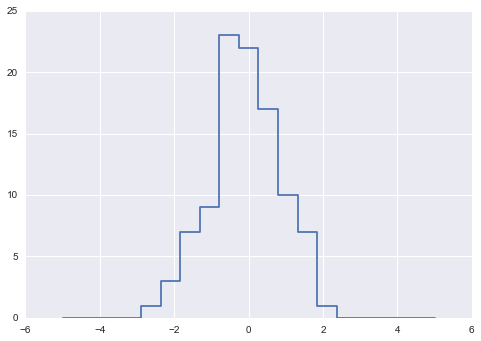

In [ ]:
# plot the results
plt.plot(bins, counts, linestyle='steps');

Por supuesto, sería una tontería tener que hacer esto cada vez que se quiera trazar un histograma.
Por eso Matplotlib proporciona la rutina ``plt.hist()``, que hace lo mismo en una sola línea:

```python
plt.hist(x, bins, histtype='step');
```

Esta función creará un gráfico casi idéntico al que se ve aquí.
Para calcular el binning, ``matplotlib`` utiliza la función ``np.histogram``, que hace un cálculo muy similar al que hicimos antes. Vamos a comparar los dos aquí:

In [ ]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
10000 loops, best of 3: 97.6 µs per loop
Custom routine:
10000 loops, best of 3: 19.5 µs per loop


¡Nuestro propio algoritmo de una línea es varias veces más rápido que el algoritmo optimizado en NumPy! ¿Cómo puede ser esto?
Si investigas el código fuente de ``np.histograma`` (puedes hacerlo en IPython escribiendo ``np.histograma??``), verás que está bastante más involucrado que el simple buscar-y-contar que hemos hecho; esto es porque el algoritmo de NumPy es más flexible, y particularmente está diseñado para un mejor rendimiento cuando el número de puntos de datos se hace grande:

In [ ]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
10 loops, best of 3: 68.7 ms per loop
Custom routine:
10 loops, best of 3: 135 ms per loop


Lo que muestra esta comparación es que la eficiencia algorítmica casi nunca es una cuestión sencilla. Un algoritmo eficiente para conjuntos de datos grandes no siempre será la mejor opción para conjuntos de datos pequeños, y viceversa (véase [Big-O Notación](02.08-Sorting.ipynb#Aside:-Big-O-Notación)).
Pero la ventaja de codificar este algoritmo por ti mismo es que con una comprensión de estos métodos básicos, podrías usar estos bloques de construcción para extender esto para hacer algunos comportamientos personalizados muy interesantes.
La clave para usar eficientemente Python en aplicaciones de datos intensivos es conocer las rutinas generales de conveniencia como ``np.histograma`` y cuándo son apropiadas, pero también saber cómo hacer uso de la funcionalidad de nivel inferior cuando se necesita un comportamiento más puntual.

<!--NAVIGATION-->
< [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb) | [Contents](Index.ipynb) | [Sorting Arrays](02.08-Sorting.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.07-Fancy-Indexing.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
